# Scenemixer - composite versions
Creating composite images from spreadsheet

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from skimage import io, transform, filters, color
from skimage import img_as_uint, img_as_float
from tools import *
import os
%matplotlib inline

In [16]:
db_folder = "/Users/jiri/Local/Datasets/SceneStroop/processed/"  # must end with /
#db_folder = "/Users/jiri/Local/Datasets/SceneStroop/masks/"   # for masks
image_folder = "./images/"
out_folder = "/Users/jiri/Local/Sandbox/mix/"

new_size     = (1024, 1024) # in pixels (width, height)
radius       = 248          # radius of central/inside area
radius_out   = 2 * radius
ring_width   = 20
ring_colour  = (128, 128, 128)

In [19]:
# load db 
db1_fn = "/Users/jiri/Documents/Projects/SceneStroopPilot/design_task_in.csv"
db2_fn = "/Users/jiri/Documents/Projects/SceneStroopPilot/design_task_out.csv"

db1 = pd.read_csv(db1_fn)
db2 = pd.read_csv(db2_fn)

#image_in = ["MS5.jpg", "MS5.jpg", "NF4.jpg", "NF4.jpg"]
#image_out = ["NF4.jpg", "MH4.jpg", "MS5.jpg", "ND2.jpg"]
image_in = db1["in_file"].tolist() + db2["in_file"].tolist()
image_out = db1["out_file"].tolist() + db2["out_file"].tolist() 

#image_in = ["mask_{:03d}.jpg".format(i) for i in range(1, 11)]
#image_out = ["mask_{:03d}.jpg".format(i) for i in range(1, 11)]

In [20]:
# keep as it is
fn_all = set().union(image_in, image_out)
fn_gray = "%s%s" % (image_folder, "gray.png")
img = {}

for fn in fn_all:
    fn_full = "%s%s" % (db_folder, fn)
    im = io.imread(fn_full)
    if im.dtype == "O":
        im = im[0]  # ugly hack to overcome old PIL library, pillow should be used http://stackoverflow.com/questions/24089337/skimage-simple-imread-of-image-return-strange-output 
    cropped = crop_and_resize_image(img_as_float(im), new_size, grayscale=True)
    img[fn] = cropped

any_img = img.itervalues().next()
gray = crop_and_resize_image(img_as_float(io.imread(fn_gray)), new_size, grayscale=True)
_, ring = make_ring_for_image(any_img, radius = radius, width50 = ring_width, colour = ring_colour)
_, ring_out = make_ring_for_image(any_img, radius = radius_out, width50 = ring_width, colour = ring_colour)

In [21]:
for fin, fout in zip(image_in, image_out):
    name_in  = os.path.splitext(os.path.basename(fin))[0]
    name_out = os.path.splitext(os.path.basename(fout))[0]
    print "image: %s %s" % (name_in, name_out)
    fn_res  = "%s%s%s" % (name_in, name_out, ".jpg")
    im1  = combine_images(img[fin], img[fout], radius)
    im = combine_images(im1, gray, radius_out)
    if ring_width == 0:
        imf = im
    else:
        imf = add_ring(im, ring)
        imf = add_ring(imf, ring_out)            
    io.imsave(out_folder + fn_res, imf)


image: mask_001 mask_001
image: mask_002 mask_002
image: mask_003 mask_003
image: mask_004 mask_004
image: mask_005 mask_005
image: mask_006 mask_006
image: mask_007 mask_007
image: mask_008 mask_008
image: mask_009 mask_009
image: mask_010 mask_010


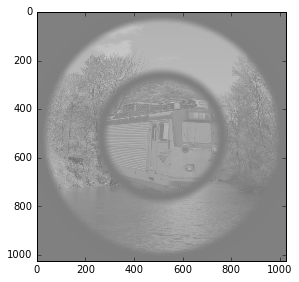

In [15]:
io.imshow(imf)